<a href="https://colab.research.google.com/github/ndawinata/googleCO/blob/master/Regresi%20Linier_dan_klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import vega_datasets
import matplotlib.pyplot as plt

In [2]:
cars = vega_datasets.data.cars()
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


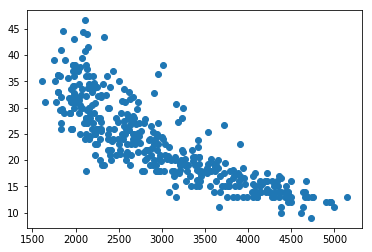

In [4]:
plt.scatter(cars['Weight_in_lbs'], cars['Miles_per_Gallon'] )

In [5]:
cars['Miles_per_Gallon'].max()

46.6

In [7]:
cars['Miles_per_Gallon'].min()

9.0

In [8]:
cars['Weight_in_lbs'].max()

5140

In [9]:
cars['Weight_in_lbs'].min()

1613

In [10]:
cars.loc[cars['Weight_in_lbs']>5000]

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
51,12.0,8,400.0,175.0,13.0,pontiac safari (sw),USA,5140,1971-01-01


In [0]:
iris = vega_datasets.data.iris()

In [12]:
iris.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


In [13]:
set(iris['species'])

{'setosa', 'versicolor', 'virginica'}

In [0]:
iris['color'] = iris['species']
iris['color'] = iris['color'].replace('setosa','green').replace('versicolor','red').replace('virginica','blue')

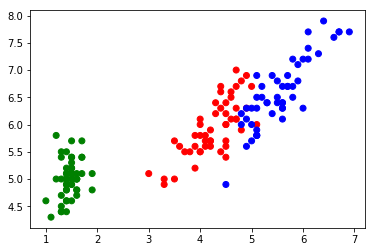

In [20]:
plt.scatter(iris['petalLength'], iris['sepalLength'], c=iris['color'])

In [0]:
####################### REGRESI LINIER SEDERHANA ##############################

In [0]:
import seaborn as sn
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

In [22]:
cr = vega_datasets.data.cars()
cr.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


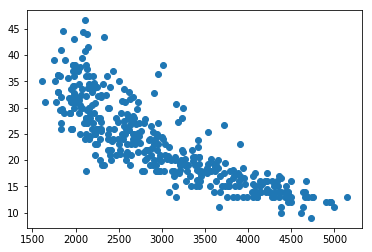

In [23]:
plt.scatter(cr['Weight_in_lbs'], cr['Miles_per_Gallon'])

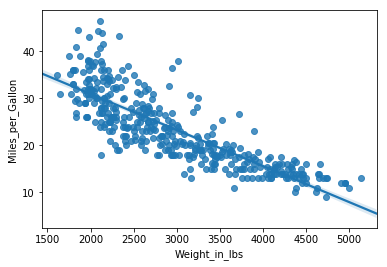

In [27]:
sn.regplot(cr['Weight_in_lbs'], cr['Miles_per_Gallon'])

In [29]:
set(cr['Weight_in_lbs'].isna()) #cek data kosong => ternyata tidak ada

{False}

In [30]:
set(cr['Miles_per_Gallon'].isna()) #cek data kosong => ternyata ada

{False, True}

In [0]:
x = cr['Weight_in_lbs']
y = cr['Miles_per_Gallon']
y = y.fillna(y.mean())  #isi y yang kosong dengan rata rata

In [35]:
set(y.isna()) #cek kosong apa udah terisi

{False}

In [0]:
x = np.array(x)
y = np.array(y)

In [38]:
x.shape #cek panjang data

(406,)

In [41]:
x

array([3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 3850, 3090,
       4142, 4034, 4166, 3850, 3563, 3609, 3353, 3761, 3086, 2372, 2833,
       2774, 2587, 2130, 1835, 2672, 2430, 2375, 2234, 2648, 4615, 4376,
       4382, 4732, 2130, 2264, 2228, 2046, 1978, 2634, 3439, 3329, 3302,
       3288, 4209, 4464, 4154, 4096, 4955, 4746, 5140, 2962, 2408, 3282,
       3139, 2220, 2123, 2074, 2065, 1773, 1613, 1834, 1955, 2278, 2126,
       2254, 2408, 2226, 4274, 4385, 4135, 4129, 3672, 4633, 4502, 4456,
       4422, 2330, 3892, 4098, 4294, 4077, 2933, 2511, 2979, 2189, 2395,
       2288, 2506, 2164, 2100, 4100, 3672, 3988, 4042, 3777, 4952, 4464,
       4363, 4237, 4735, 4951, 3821, 3121, 3278, 2945, 3021, 2904, 1950,
       4997, 4906, 4654, 4499, 2789, 2279, 2401, 2379, 2124, 2310, 2472,
       2265, 4082, 4278, 1867, 2158, 2582, 2868, 3399, 2660, 2807, 3664,
       3102, 2875, 2901, 3336, 1950, 2451, 1836, 2542, 3781, 3632, 3613,
       4141, 4699, 4457, 4638, 4257, 2219, 1963, 23

In [0]:
x = x.reshape(len(x),1) #rubah shape dari array x
y = y.reshape(len(y),1) #rubah shape dari array y

In [49]:
x.shape

(406, 1)

In [50]:
x

array([[3504],
       [3693],
       [3436],
       [3433],
       [3449],
       [4341],
       [4354],
       [4312],
       [4425],
       [3850],
       [3090],
       [4142],
       [4034],
       [4166],
       [3850],
       [3563],
       [3609],
       [3353],
       [3761],
       [3086],
       [2372],
       [2833],
       [2774],
       [2587],
       [2130],
       [1835],
       [2672],
       [2430],
       [2375],
       [2234],
       [2648],
       [4615],
       [4376],
       [4382],
       [4732],
       [2130],
       [2264],
       [2228],
       [2046],
       [1978],
       [2634],
       [3439],
       [3329],
       [3302],
       [3288],
       [4209],
       [4464],
       [4154],
       [4096],
       [4955],
       [4746],
       [5140],
       [2962],
       [2408],
       [3282],
       [3139],
       [2220],
       [2123],
       [2074],
       [2065],
       [1773],
       [1613],
       [1834],
       [1955],
       [2278],
       [2126],
       [22

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [54]:
len(x) #jumlah awal mula

406

In [55]:
len(X_train)  #hasil split 304 untuk training

304

In [56]:
len(X_test) #hasil split 102 untuk menguji/test 

102

In [57]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

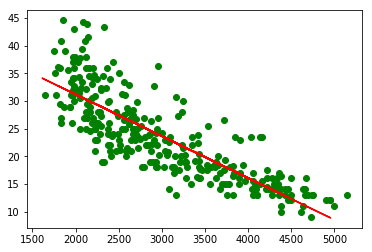

In [59]:
y_test_pred = linear_reg.predict(X_test)
plt.scatter(X_train, y_train,color='green')
plt.plot(X_test, y_test_pred,color='red')

In [62]:
print(sm.mean_absolute_error(y_test, y_test_pred))

3.146212786865748


In [63]:
print(sm.mean_squared_error(y_test, y_test_pred))

18.41983346431122
